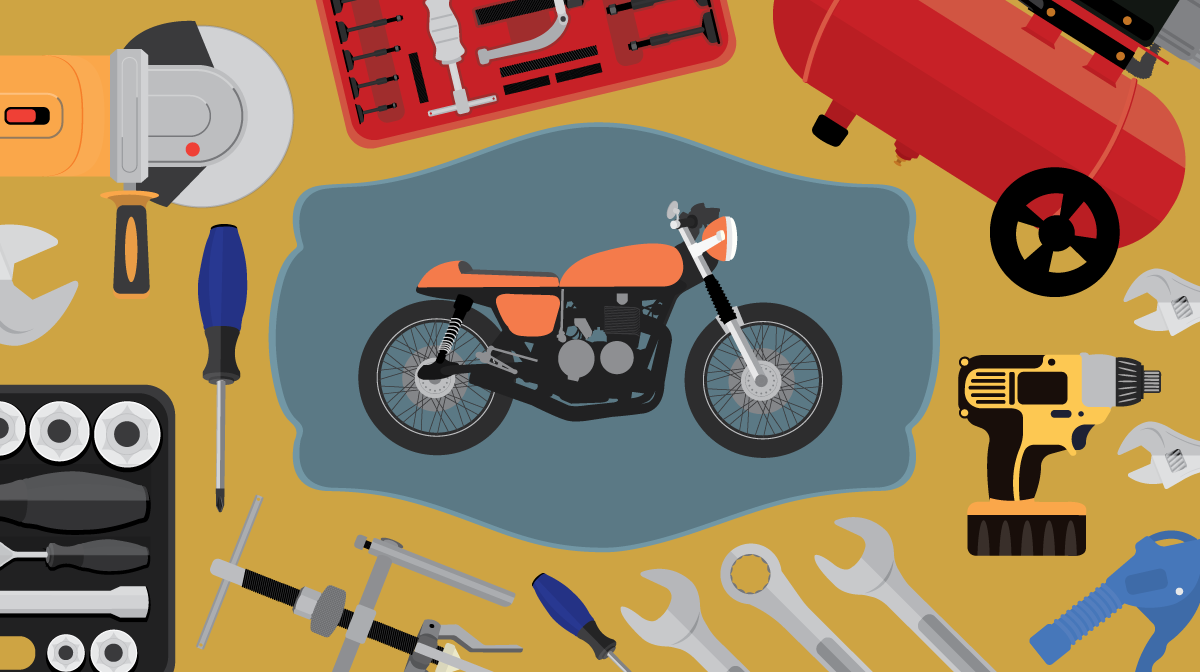

In [54]:
from IPython import display
display.Image("./top-motorcycle-tools-open-graph.png")

# 📕 Overview


The motorcycle parts industry is an increasingly saturated market, due to the rising popularity of motorcycles as the primary mode of transportation and riding as a leasure activity. In order to remain competitive, businesses must leverage data analysis to gain inights and drive strategic decision-making. In this research report we thus explore the sales data of a motorycle parts company operating three warehouses in a large metropolitan area. The goal is to provide valuable insights to a colleague, leveraging data manipulation and visualization methods, who seeks to analyze sales patterns and usage preferences of the company's different product lines and payment methods.

The research objectives are the following:
1. Investigate the sales performance of each product line.
2. Explore the purchasing behavior and preferences of different client types.
3. Evaluate sales performance across the three warehouses.
4. To evaluate and determine the most utilized payment method among customers.
5. Analyze the sales data over time to identify patterns, trends, and seasonality.

The sales data used for the analysis contains the following fields:
- "**date**" - The date, from June to August 2021.
- "**warehouse**" - The company operates three warehouses: North, Central, and West.
- "**client_type**" - There are two types of customers: Retail and Wholesale.
- "**product_line**" - Type of products purchased.
- "**quantity**" - How many items were purchased.
- "**unit_price**" - Price per item sold.
- "**total**" - Total sale = quantity * unit_price.
- "**payment**" - How the client paid: Cash, Credit card, Transfer.

The report is structured into three distinct sections: an exploratory data analysis section, a main analysis section, and a final section for conclusions and recommendations.

# 📗 Exploratory Data Analysis

The purpose of this section is to gain familiarity with the motorcycle parts sales data and acquire a preliminary understanding of its characteristics. Below we can see the first five rows of the dataset, with the headers adapted for greater readability:

In [56]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from scipy.stats import iqr
import matplotlib.dates as dates
from dython.nominal import associations
# Setting the style of the visualizations that will follow
plt.style.use("bmh")

In [57]:
# Importing sales data
sales_data = pd.read_csv('data/sales_data.csv', parse_dates=['date']) #Transforming the date column into a datetime object

#Renaming the columns
sales_data = sales_data.rename(columns={"date":"Date","warehouse":"Warehouse Location", "client_type":"Client Type", 
                                        "product_line":"Product Line", "quantity":"Quantity", "unit_price":"Unit Price",
                                        "total":"Total Revenue","payment":"Payment Type"})

#Correcting the value "Breaking system" to "Braking System"
sales_data['Product Line'] = sales_data['Product Line'].map({"Breaking system":"Braking system",
                                                             "Suspension & traction":"Suspension & traction",
                                                            "Electrical system":"Electrical system",
                                                            "Frame & body": "Frame & body",
                                                            "Miscellaneous":"Miscellaneous",
                                                            "Engine":"Engine"})
sales_data.head(5)

,Date,Warehouse Location,Client Type,Product Line,Quantity,Unit Price,Total Revenue,Payment Type
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Braking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


The first step is to check the dataset for any dirty/missing data. From the table below, we can see that the dataset doesn't contain any null values and all data types are assigned correctly. There are five categorical variables — date, warehouse, client type, product line, and payment type — and only three numerical variables: quantity, unit price, and total revenue (quantity * unit price).

In [58]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1000 non-null   datetime64[ns]
 1   Warehouse Location  1000 non-null   object        
 2   Client Type         1000 non-null   object        
 3   Product Line        1000 non-null   object        
 4   Quantity            1000 non-null   int64         
 5   Unit Price          1000 non-null   float64       
 6   Total Revenue       1000 non-null   float64       
 7   Payment Type        1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


## Analyzing categorical variables

Using descriptive statistics, we can understand the composition and distribution of different groups or categories within the sales dataset.

In [59]:
cat_des = sales_data.describe(exclude=[np.number])
cat_des.style.set_properties(**{'text-align': 'center'})

,Date,Warehouse Location,Client Type,Product Line,Payment Type
count,1000,1000,1000,1000,1000
unique,89,3,2,6,3
top,2021-07-08 00:00:00,Central,Retail,Braking system,Credit card
freq,20,480,775,230,659
first,2021-06-01 00:00:00,nan,nan,nan,nan
last,2021-08-28 00:00:00,nan,nan,nan,nan


From the date column we can see that the dataset is incomplete, containing motorcycle part sales only for the summer months, from June 1st to August 28th. Any insights drawn may thus be subject to seasonality; in order to make any generalizations related to the rest of the year, data collected in the previous/following months is required. Although this out of scope, it is important to keep in mind these considerations when reading the report.

Moving on, 1000 sales have been completed in these three months, with the warehouse that sold the most parts being centrally located (48%), and with Retail customers being the ones who purchase with greatest frequency (78% of transactions). Most transactions are done using a credit card (66%), and the most popular product line is the braking system (23%). Given that payment type, warehouse location, and product line are variables that have more than two unique categories, it is best to visualize them using countplots to see if these inter-category differences are pronounced:

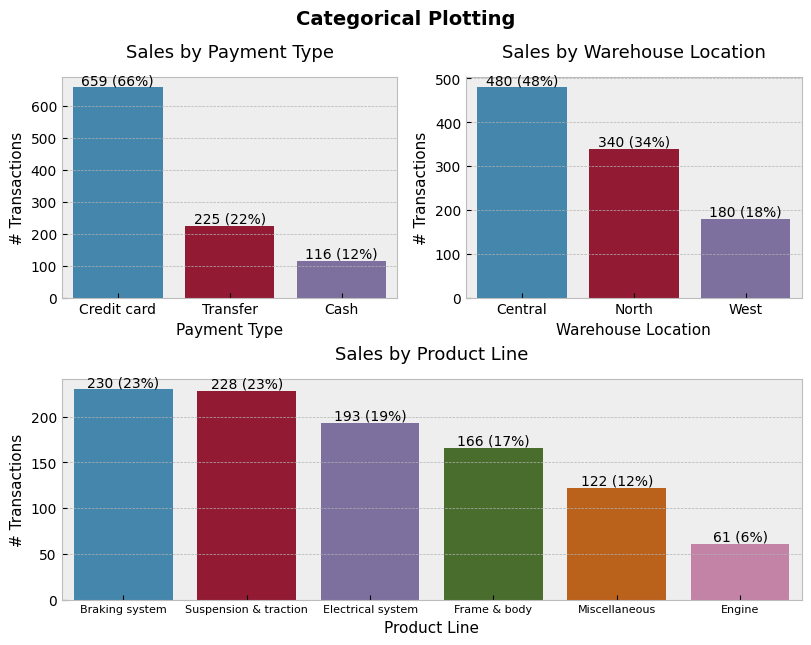

In [60]:
fig = plt.figure(figsize=(8, 6), layout="constrained")
spec = fig.add_gridspec(2, 2)

#Subplot 1: Transactions purchased by Payment Type
ax00 = fig.add_subplot(spec[0, 0])
sns.countplot(x = sales_data["Payment Type"],order=sales_data["Payment Type"].value_counts(ascending=False).index,
             ax = ax00)
abs_values = sales_data["Payment Type"].value_counts(ascending=False).values
rel_values = sales_data["Payment Type"].value_counts(ascending=False, normalize=True).values * 100
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax00.bar_label(container=ax00.containers[0], labels=labels)
plt.title("Sales by Payment Type",fontsize = 13,y=1.05)
plt.xlabel("Payment Type", fontsize = 11)
plt.ylabel("# Transactions",fontsize = 11)

#Subplot 2: Transactions by Warehouse Location
ax01 = fig.add_subplot(spec[0, 1])
sns.countplot(x = sales_data["Warehouse Location"],order=sales_data["Warehouse Location"].value_counts(ascending=False).index,
             ax = ax01)
abs_values = sales_data["Warehouse Location"].value_counts(ascending=False).values
rel_values = sales_data["Warehouse Location"].value_counts(ascending=False, normalize=True).values * 100
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax01.bar_label(container=ax01.containers[0], labels=labels)
plt.title("Sales by Warehouse Location", fontsize = 13,y=1.05)
plt.xlabel("Warehouse Location", fontsize = 11)
plt.ylabel("# Transactions",fontsize = 11)

#Subplot 3: Transactions by Product Line
ax1 = fig.add_subplot(spec[1, :])
sns.countplot(x = sales_data["Product Line"],order=sales_data["Product Line"].value_counts(ascending=False).index,
             ax = ax1)
abs_values = sales_data["Product Line"].value_counts(ascending=False).values
rel_values = sales_data["Product Line"].value_counts(ascending=False, normalize=True).values * 100
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax1.bar_label(container=ax1.containers[0], labels=labels)
plt.title("Sales by Product Line",fontsize = 13,y=1.05)
plt.xticks(fontsize = 8)
plt.xlabel("Product Line", fontsize = 11)
plt.ylabel("# Transactions", fontsize = 11)
plt.suptitle("Categorical Plotting", fontsize = 14, fontweight = "bold",y=1.05)
plt.show()

When it comes to payment type, the countplot confirms a large discrepancy between categories; an overwhelming majority of clients prefer to pay by card. The same cannot be said for warehouse location and product line, wherein although the centrally-located warehouse has the most sales, the difference with the warehouse located north is of 14 p.p., while, when it comes to the different product lines offered, the number of braking systems sold (230) is only slightly greater than that of the suspension and traction systems (228).

## Analyzing numerical variables
Having analyzed the categorical variables, we can now move on to using summary statistics to analyze quantity, unit price, and total revenue.

In [61]:
des_stats = sales_data.describe(exclude = ["object","datetime"])
des_stats = des_stats.rename(columns={"Unit Price":"Unit Price ($)",
                                      "Quantity":"Quantity (n. units)",
                                      "Total Revenue":"Total Revenue ($)"})

for col in des_stats.columns:
    if col == "Quantity (n. units)":
        des_stats[col] = des_stats[col].apply(round)
    else:
        des_stats[col] = des_stats[col].round(2).map('{:,.2f}'.format)

des_stats.style.set_properties(**{'text-align': 'center'})

,Quantity (n. units),Unit Price ($),Total Revenue ($)
count,1000,"1,000.00","1,000.00"
mean,9,30.32,289.11
std,10,12.26,345.23
min,1,10.03,10.35
25%,4,21.08,93.69
50%,6,28.57,178.36
75%,10,37.92,321.69
max,40,66.62,"2,546.33"


The largest transaction registered in the dataset is of 40 motorcycle parts, while the smallest is of one. The average quantity sold is nine parts, with significant variability (std = 10). Meanwhile, the cheapest motorcycle part comes to ten dollars, and the most expensive to 67 dollars, with a moderate level of variability (std=12). Finally, when it comes to total revenue, the average transaction amounts to 289 dollars, with the smallest being 10 dollars and the largest 2.546 dollars. Also this variable experiences high variability, with a std of 345 dollars, most likely influenced by the variability of quantity and unit price. 

To determine which of the two variables has the greatest influence, we can examine — as part of an initial assessment — their respective _coefficient of variation (CV)_. Namely, quantity has a greater relative variability compared to its mean (111.11%) than unit price (40%) does, suggesting that quantity is most likely the culprit of such a high variability in total revenue. Nevertheless, it is important to identify whether such a high variability in these variables is due to a presence of extreme values, via a boxplot analysis:

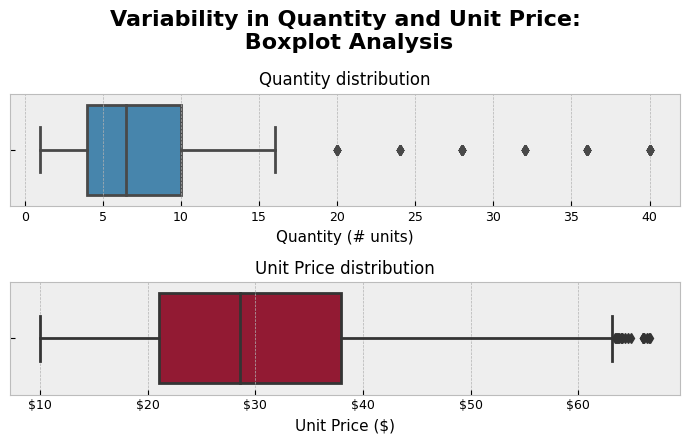

In [62]:
#Plotting a histogram for the three numeric variables to visualize the summary stats.
num_vars= sales_data.select_dtypes(exclude=["object","datetime"])
num_cols = num_vars[["Quantity","Unit Price"]]
palette = ["#3689BD","#A60628"]
fig = plt.figure(figsize = (7,6))

a = 3
b = 1
c = 1
i=0
fig.suptitle('Variability in Quantity and Unit Price:\n Boxplot Analysis', fontsize = 16, fontweight = "bold")

for col in num_cols:
    plt.subplot(a, b, c)
    plt.title(f'{col} distribution',fontsize = 12)
    plt.xlabel(col)
    l = sns.boxplot(x = num_cols[col], orient = "h", color = palette[i])
    plt.xlabel(col, fontsize = 11)
    plt.xticks(fontsize=9)
    if col == "Unit Price":
        l.xaxis.set_major_formatter('${x:1.0f}')
        plt.xlabel("Unit Price ($)")
    else:
        plt.xlabel("Quantity (# units)")
    c += 1
    i+=1

plt.tight_layout()
plt.show()

As expected, the higher variability identified in quantity is due to the presence of extreme outliers. While most sales are in the range of 1 to around 16 motorcycle parts, there are a number of transactions that run between 17 and 40 parts. On the other hand, unit price has a wider spread, with its outliers falling just outside the upper whisker. 

## Outlier Analysis
Using the IQR, we can identify those transactions that have outliers for either quantity or price, and determine whether there are any characteristics that stand out:

In [63]:
#IQR quantity
iqr_q = iqr(sales_data["Quantity"])
#Thresholds Quantity
lt_q= np.quantile(sales_data["Quantity"], 0.25) - 1.5 * iqr_q
ut_q= np.quantile(sales_data["Quantity"], 0.75) + 1.5 * iqr_q

#IQR Unit Price
iqr_p = iqr(sales_data["Unit Price"])
#Thresholds Unit Price
lt_p= np.quantile(sales_data["Unit Price"], 0.25) - 1.5 * iqr_p
ut_p= np.quantile(sales_data["Unit Price"], 0.75) + 1.5 * iqr_p

#Finding the outliers
outliers = sales_data[(sales_data["Quantity"] < lt_q) | (sales_data["Quantity"] > ut_q) | 
         (sales_data["Unit Price"] < lt_p) | (sales_data["Unit Price"] > ut_p)]

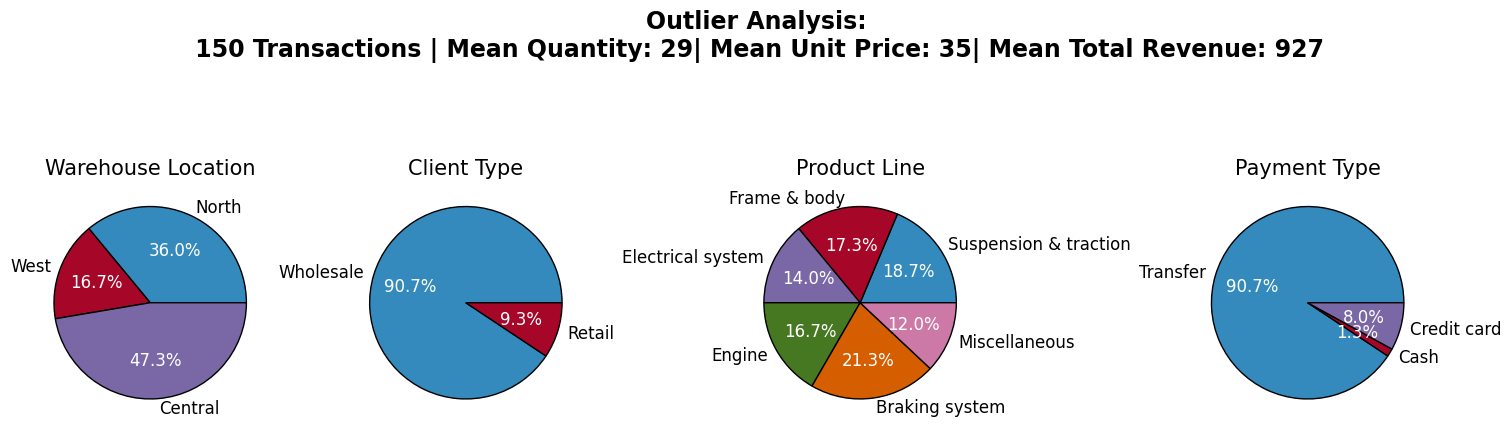

In [64]:
def outlier_pies(outliers):
    
    # number of categorical variables
    c = len(outliers.select_dtypes("object").nunique())

    outlier_quantity = outliers["Quantity"].mean()
    outlier_price = outliers["Unit Price"].mean()
    outlier_revenue = outliers["Total Revenue"].mean()
    cases = outliers.shape[0]

    fig = plt.figure(figsize=(15, 10), constrained_layout = True)
 
    fig.suptitle("Outlier Analysis:\n " + \
            f'{cases:,.0f}' + " Transactions " + \
            "| Mean Quantity: " + f'{outlier_quantity:.0f}' + \
            "| Mean Unit Price: " + f'{outlier_price:.0f}' + \
            "| Mean Total Revenue: " + f'{outlier_revenue:.0f}', fontweight = "bold", fontsize = 17)

    ax1 = plt.subplot2grid((2,c),(0,0))
    plt.pie(outliers["Warehouse Location"].value_counts(sort = False), labels=outliers["Warehouse Location"].unique(),
            autopct='%.1f%%',textprops={'fontsize': 12, 'color': "w"},
            wedgeprops={'edgecolor': 'black', 'linewidth': 1})
    [ax1.texts[i].set_color('black') for i in range(len(ax1.texts)) if i % 2 == 0]
    plt.title("Warehouse Location", fontsize = 15);

    ax1 = plt.subplot2grid((2,c),(0,1))
    plt.pie(outliers["Client Type"].value_counts(sort = False),labels=outliers["Client Type"].unique(),
            autopct='%.1f%%',textprops={'fontsize': 12, 'color': "w"},
            wedgeprops={'edgecolor': 'black', 'linewidth': 1})
    [ax1.texts[i].set_color('black') for i in range(len(ax1.texts)) if i % 2 == 0]
    plt.title("Client Type", fontsize = 15);

    ax1 = plt.subplot2grid((2,c),(0,2))
    plt.pie(outliers["Product Line"].value_counts(sort = False), labels=outliers["Product Line"].unique(),
            autopct='%.1f%%',textprops={'fontsize': 12, 'color': "w"},
            wedgeprops={'edgecolor': 'black', 'linewidth': 1})
    [ax1.texts[i].set_color('black') for i in range(len(ax1.texts)) if i % 2 == 0]
    plt.title("Product Line", fontsize = 15);

    ax1 = plt.subplot2grid((2,c),(0,3))
    plt.pie(outliers["Payment Type"].value_counts(sort = False), labels=outliers["Payment Type"].unique(),
            autopct='%.1f%%',textprops={'fontsize': 12, 'color': "w"},
            wedgeprops={'edgecolor': 'black', 'linewidth': 1})
    [ax1.texts[i].set_color('black') for i in range(len(ax1.texts)) if i % 2 == 0]
    plt.title("Payment Type", fontsize = 15);
outlier_pies(outliers)

There are 150 transactions that either have quantity or unit price that is an outlier. Within this subgroup, the average quantity of parts purchased is 29 units, with the average unit price being 35 dollars. Average total revenue is of 927 dollars. In terms of defining characteristics, the overwhelming majority of transactions are performed by wholesale clients (91%). This is unsurprising as, by nature, they purchase in bulk. 

Interestingly enough, the most frequent payment type is bank transfers, in a percentage that is identical to that of the number of wholesale customers (91%). Similarly, while retail customers are 9.3% of this subgroup, their numbers are equal to the sum of credit card (8%) and cash (1.3%) transactions. Whether this 1:1 relationship is generalizable to the rest of the dataset will be explored in the next section. Finally, not much can be said about warehouse location and product line, as their values are in line with the rest of the dataset.

The question that naturally follows from this outlier analysis is: should they be eliminated from the dataset? It seems that these extreme values are not a product of erroneous data imputation, but, rather, of a client type that, albeit inferior in numbers, has a buying behavior that differs substantially from the other. Namely, 225 transactions are attributed to wholesale customers, comprising 23% of the dataset; considering that 126 transactions of the outlier subgroup are also attributed to them, this implies that 60% of wholesale sales "abnormal". We can further refute this by plotting quantity and unit price by client type:

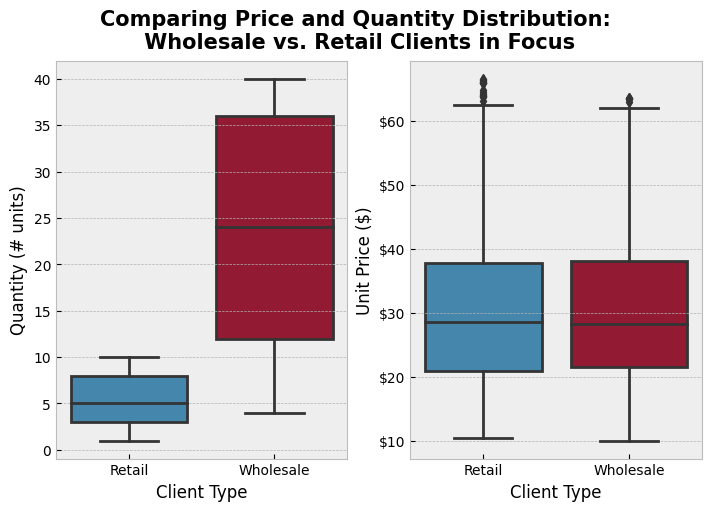

In [65]:
fig = plt.figure(figsize=(7, 5), layout="constrained")
spec = fig.add_gridspec(4, 2)
plt.suptitle("Comparing Price and Quantity Distribution:\n Wholesale vs. Retail Clients in Focus", fontsize = 15, fontweight = "bold")

#Subplot 1: Quantity by Client Type
ax00 = fig.add_subplot(spec[:, :-1])
sns.boxplot(x = sales_data["Client Type"], y = sales_data["Quantity"],orient = "v", ax = ax00)
plt.ylabel("Quantity (# units)")
#Subplot 2: Unit Price by Client Type
ax10 = fig.add_subplot(spec[0:, 1])
sns.boxplot(x = sales_data["Client Type"], y = sales_data["Unit Price"],orient = "v", ax = ax10)
ax10.yaxis.set_major_formatter('${x:1.0f}')
plt.ylabel("Unit Price ($)")
plt.show()


The above boxplots confirm the initial analysis: by client type, quantity doesn't have any extreme values. Wholesale customers have a median transaction size that is almost 20 parts greater than that of Retail customers. Instead, interestingly enough, the spread of unit price is almost identical for both client types, implying that wholesale customers do not get any price concessions despite, on average, making larger purchases. In addition, the existence of outliers for unit price persists (18 transactions), more so for retail clients (78%) than wholesale clients (22.2%) as illustrated in the pie charts below. These extreme values are found only for engines. Further investigation as to why this is the case requires more information on the product's characteristics, which aren't included in the dataset provided.

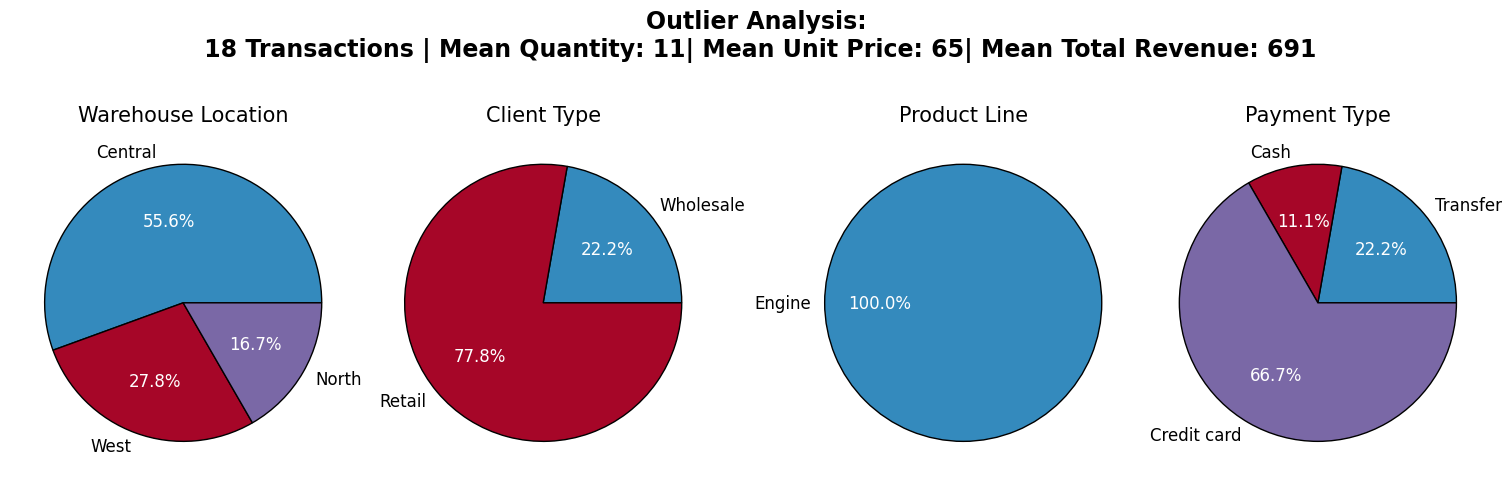

In [66]:
#IQR Unit Price
iqr_p = iqr(sales_data["Unit Price"])
#Thresholds Unit Price
lt_p= np.quantile(sales_data["Unit Price"], 0.25) - 1.5 * iqr_p
ut_p= np.quantile(sales_data["Unit Price"], 0.75) + 1.5 * iqr_p

#Finding the outliers
outliers_price = sales_data[(sales_data["Unit Price"] < lt_p) | (sales_data["Unit Price"] > ut_p)]
outlier_pies(outliers_price)

## Conclusions

The available data provides insights into motorcycle part sales only during the summer months. Thus, while caution must be exercised due to the incomplete nature of the dataset, patterns related to warehouse location, customer type, payment method, and product line can be identified. The strong variability in quantity was determined to be due to the distinct behavior of wholesale customers; on average, they purchase greater quantities of motorcycle parts compared to their retail counterparts. For unit price, the variability was found to be due to the presence of outliers, arising from Engine sales. Further investigation into these elements will be performed in the next section.

# 📘 Main Analysis
## 💵 Payment Methods Analysis: Understanding Customer Preferences and Usage Patterns

Bank transfers are the payment type associated with the most revenue, at 159.6K dollars. Cash, on the other hand, is the payment type associated with the least amount of revenue, at 19.2K dollars. Revenue from credit card transactions lies in-between, at 110.3K dollars. In breaking down total revenue by client type, we can generalise what arose from the outlier analysis to the rest of the dataset: wholesale customers pay only using bank transfers while retail customers primarily by credit card and, in some cases, cash. The former also generates the most revenue besides being responsible for only 23% of transactions in the dataset.

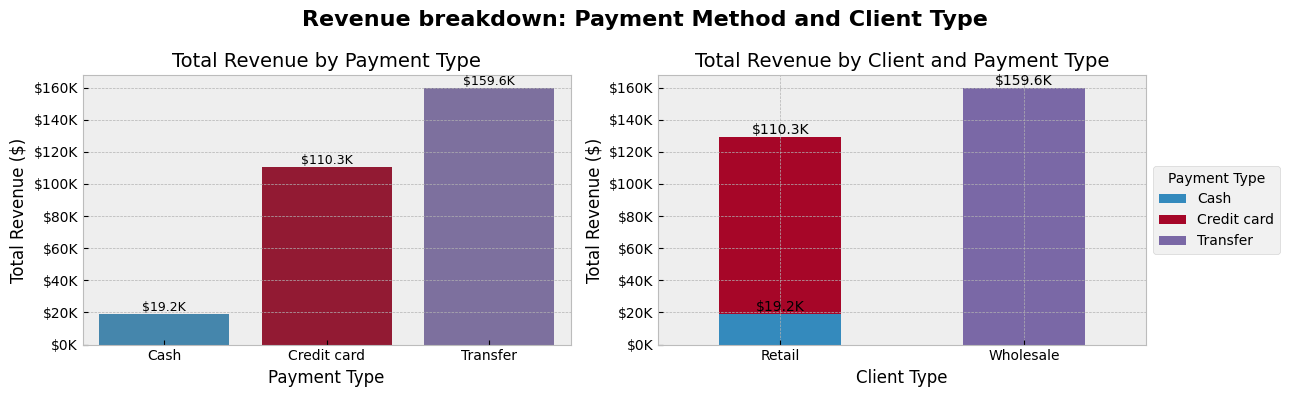

In [67]:
# Function to format the y-ticks.
def thousands(x, pos):
    """The two arguments are the value and tick position."""
    return f'${x*1e-3:.0f}K'

# Creating a figure with two subplots, arranged horizontally (nrow = 1, ncols = 2)
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

# Adding a title to the figure
plt.suptitle("Revenue breakdown: Payment Method and Client Type", fontweight = "bold", fontsize = 16)

# First subplot: Total Revenue ($) by Payment Type
pm_sales = sales_data.groupby("Payment Type")["Total Revenue"].sum().reset_index()
sns.barplot(x="Payment Type", y="Total Revenue", data=pm_sales, ax=axes[0])

# Formatting the y-axis ticks
axes[0].yaxis.set_major_formatter(thousands)

# Adding labels to the bars
for c in axes[0].containers:
    labels = [f'${(v.get_height() / 1000):.1f}K' for v in c]
    axes[0].bar_label(c, labels=labels, label_type='edge', fontsize = 9)

# Adding axis labels and a title to the subplot
axes[0].set_ylabel("Total Revenue ($)", fontsize = 12)
axes[0].set_xlabel("Payment Type", fontsize =12)
axes[0].set_title("Total Revenue by Payment Type", fontsize = 14)

# Second subplot: Total Revenue ($) by Client Type
sales_client_type = pd.pivot_table(index = "Client Type", columns = "Payment Type", values = "Total Revenue",
                                          aggfunc = "sum", data = sales_data)
sales_client_type.plot.bar(stacked = True, ax=axes[1])

# Formatting the y-axis ticks
axes[1].yaxis.set_major_formatter(thousands)

# Rotating the x-axis labels
plt.xticks(rotation = 0)

# Adding a legend to the subplot
plt.legend(title='Payment Type', loc='center left', bbox_to_anchor=(1, 0.5))

# Adding axis labels and a title to the subplot
axes[1].set_ylabel("Total Revenue ($)")
plt.xticks(rotation = 0)
axes[1].set_title("Total Revenue by Client and Payment Type", fontsize = 14)

# Adding labels to the bars
for c in axes[1].containers:

    # If the segment is small or 0, customize the labels
    labels = [f'${(v.get_height() / 1000):.1f}K' if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    axes[1].bar_label(c, labels=labels, label_type='edge')

# Deleting unused plots
[fig.delaxes(ax) for ax in axes.flatten() if not ax.has_data()]

# Adjusting the layout and displaying the plot
plt.tight_layout()
plt.show()

Wholesale customers opting to pay by bank transfer instead of other payment methods can be due to a number of reasons. One may be related to the nature of bulk purchases, where larger quantities and higher transaction values are involved.  Bank transfers eliminate the need for handling physical cash or the administrative burden of processing numerous credit card payments, facilitating internal accounting and reconciliation processes. It may also be that the company has certain payment policies and procedures in place — established to streamline their financial operations and mitigate risks — that requires wholesale customers to pay exclusively by bank transfer. This is not only because this payment method typically has lower transaction fees compared to credit card payments, but, in providing a transparent and traceable record of the purchase, it also mitigates the risk of fraud. Given that 100% of wholesale purchases are processed using this method, regardless of the single transaction size, this second scenario is most likely the case.

## 🔧 Product Line Analysis: Understanding Sales Patterns and Preferences

Engines are the most expensive item in the catalogue, with an average unit price of 60.09 dollars. It is also the item with the lowest number of units sold (627). Par contra, the cheapest item is the braking system (17.74 dollars); nevertheless, with 2130 units sold, it's the second-most popular item, right after suspension and traction systems (2145 units sold), which also happen to be the product line that generated the highest revenue (73014.21 dollars). Overall, there is significant variation exists across different product lines.

In [68]:
price_product_line = sales_data.groupby("Product Line").agg({"Unit Price":"mean",
                                                             "Quantity":"sum",
                                                             "Total Revenue":"sum"}).round(2).reset_index()
price_product_line = price_product_line.rename(columns={"Unit Price":"Average Unit Price ($)",
                                                       "Quantity":"Total Quantity Sold (n. units)",
                                                       "Total Revenue":"Total Revenue ($)"})

price_product_line["Total Revenue ($)"] = [f"${x}" for x in price_product_line["Total Revenue ($)"]]
price_product_line["Average Unit Price ($)"] = [f"${x}" for x in price_product_line["Average Unit Price ($)"]]
price_product_line.style.set_properties(subset = ["Average Unit Price ($)",
                                                  "Total Quantity Sold (n. units)",
                                                 "Total Revenue ($)"],**{'text-align': 'center'})

,Product Line,Average Unit Price ($),Total Quantity Sold (n. units),Total Revenue ($)
0,Braking system,$17.74,2130,$38350.15
1,Electrical system,$25.59,1698,$43612.71
2,Engine,$60.09,627,$37945.38
3,Frame & body,$42.83,1619,$69024.73
4,Miscellaneous,$22.81,1176,$27165.82
5,Suspension & traction,$33.97,2145,$73014.21


The bar graphs below confirm the previous insights and reveal significant regional differences across warehouse locations. The Central warehouse consistently generates higher revenue across all product lines compared to the North and West warehouses. To be exact, the Central warehouse earned a total of 141,982.88 dollars, while the North warehouse a total revenue of 100,203.63 dollars and the West warehouse only 46,926.49 dollars.

By product line, suspension and traction systems produced the highest sales in the Central (32.7k dollars) and North (30.1k dollars) warehouses, and the second-highest sales in the West warehouse (10.2k) dollars. Engines, on the other hand, performed the worst in the North (7.2k dollars) and West (3.2k dollars). In the Central warehouse, the Miscellaneous product line had the poorest sales (12.2k dollars).

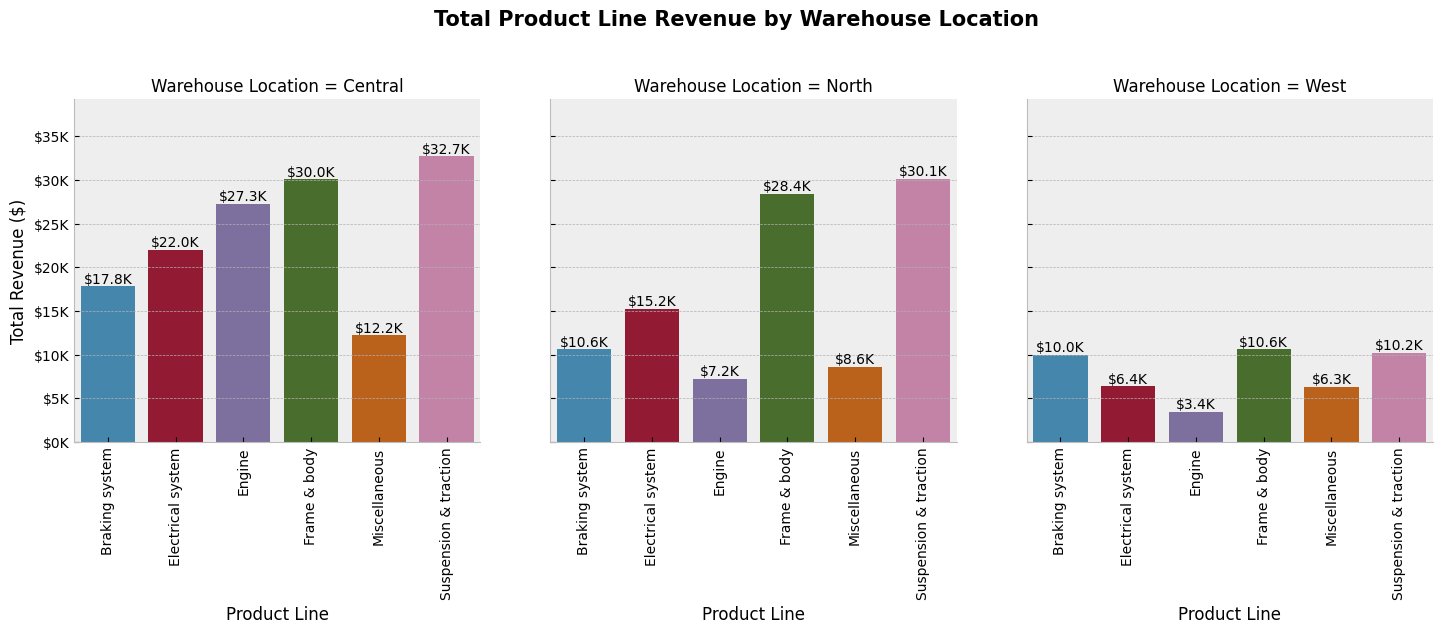

In [69]:
loc_prod = sales_data.groupby(["Warehouse Location","Product Line"])["Total Revenue"].sum().\
                                reset_index()

g = sns.catplot(col="Warehouse Location", y="Total Revenue", x="Product Line",
data=loc_prod, kind="bar", ci=False)

g.set_xticklabels(rotation=90)
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)
ax.yaxis.set_major_formatter(thousands)
ax.set_ylabel("Total Revenue ($)")
# iterate through the axes containers
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        labels = [f'${(v.get_height() / 1000):.1f}K' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

g.fig.subplots_adjust(top=.8)
g.fig.suptitle("Total Product Line Revenue by Warehouse Location", fontsize = 15, fontweight = "bold")
plt.show()

The total revenue for each product line also shows variations between retail and wholesale customers. Wholesale customers are responsible for the highest amount of sales in braking systems (23.1k dollars), engines (21.2k dollars), frame and body parts (39.5k dollars), miscellaneous items (15.7k dollars), and suspension and traction systems (38.3k dollars), while retail customers for electrical systems (21.9k dollars). Unexpectedly, the gap between product line across the two client groups is small; significant disparity exists only for braking system sales (~7.9k dollars) and frame and body part (~10k dollars) sales. Finally, it seems that suspension and traction systems, as well as frame and body parts, are once again the best-selling product lines.

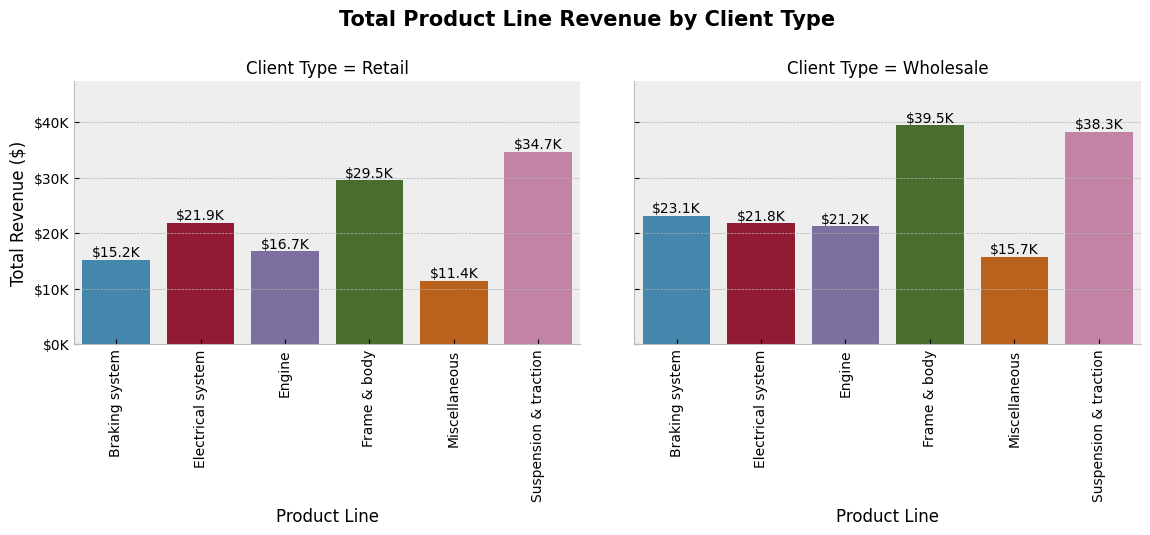

In [70]:
client_prod = sales_data.groupby(["Client Type","Product Line"])["Total Revenue"].sum().\
                                reset_index()
g = sns.catplot(col="Client Type", y="Total Revenue", x="Product Line", data=client_prod , kind="bar", ci=False,
               height = 4, aspect = 1.5)

g.set_xticklabels(rotation=90)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]
ax.yaxis.set_major_formatter(thousands)
ax.set_ylabel("Total Revenue ($)")
# iterate through the axes containers
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        labels = [f'${(v.get_height() / 1000):.1f}K' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

g.fig.subplots_adjust(top=.8)
g.fig.suptitle("Total Product Line Revenue by Client Type", fontsize = 15, fontweight = "bold")
plt.show()

##  🧩 Correlation Analysis: Exploring Inter-variable Relationships

By examining the correlation coefficients we can gain an understanding of the strength and direction of the relationships identified in the previous analyses. 

For example, the 1:1 relationship between client type and payment method is confirmed by a perfect positive association. This relationship translates to a strong association of these variables to total revenue (0.66) and quantity sold (0.76): retail customers purchase only by cash or credit card and in significantly lower volumes compared to wholesale customers, who as a result pay only using bank transfers. The lack of correlation between client type to product line, unit price, and warehouse location confirms the lack of differentiation in the company's treatment of customers with different preferences and/or purchase behaviors. While it's reasonable for the product offering to be the same for both types of customers, or the warehouses being broadly accessible, unit prices could be adapted to nudge the purchase volumes of retail customers.

Meanwhile, while quantity and unit price are both positively correlated with total revenue – unsurprising given that the latter is a product of the two — quantity has a stronger positive association (0.87) to revenue compared to unit price (0.357ice elasticity of demand may play a role: demand for motorcycle parts is most likely highly elastic due to intense competition from other players with similar product offerings. Finally unit price has a near-perfect positive correlation to unit price (0.93) — simply because certain products are more expensive than others — and thus an almost equally weak positive relationship with total revenue (0.35).

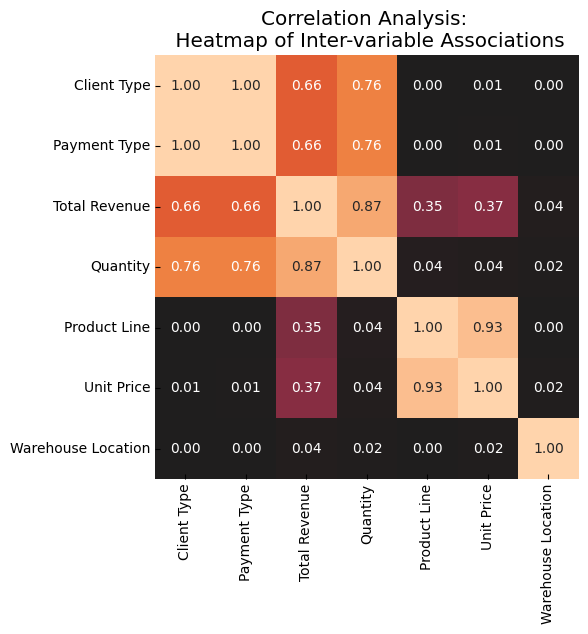

In [71]:
sales_data_corr = sales_data.loc[:,["Product Line", "Client Type", "Payment Type", "Warehouse Location", "Total Revenue", "Quantity", "Unit Price"]]
def time_data_associations():
    associations(sales_data_corr , nominal_columns = ["Product Line", "Client Type", "Payment Type", \
             "Warehouse Location"],figsize = (7.5,5.5), title="Correlation Analysis: \n Heatmap of Inter-variable Associations", clustering = True, cbar = False)

fig = time_data_associations()

## ⏱️ Time Series Analysis: Exploring Temporal Patterns

Plotting weekly revenue allows for a smoother visualization of the company's summer financial performance whilst simultaneously reducing the noise and fluctuations that are otherwise present in daily data. In fact, we can see that although week-by-week variability exists, sales are generally increasing over time; this is confirmed by the fitted linear trend line. There also seems to be an element of seasonality, characterized by the peaks and troughs at almost regular intervals; the company's most productive week was the 31st, corresponding to the month of August, wherein it made over 32K dollars. Its least productive week was the 29th, halfway through July, wherein they made less than 18k dollars.

In [72]:
# This code creates a new dataframe called time_data that is a copy of the sales_data dataframe.
# It then adds three new columns to the time_data dataframe: "Month", "Week", and "Day of Week".
# The "Month" column is created by mapping the month number to the month name using the calendar module.
# The "Week" column is created by using the transform method to apply the week number to each date in the "Date" column.
# The "Day of Week" column is created by mapping the day of the week number to the day of the week name using the calendar module.
time_data = sales_data.copy()
time_data["Month"] = [calendar.month_name[x.month] for x in sales_data["Date"]]
time_data["Week"] = time_data['Date'].transform(lambda x: x.week)
time_data["Day of Week"] = [calendar.day_name[x.dayofweek] for x in sales_data["Date"]]

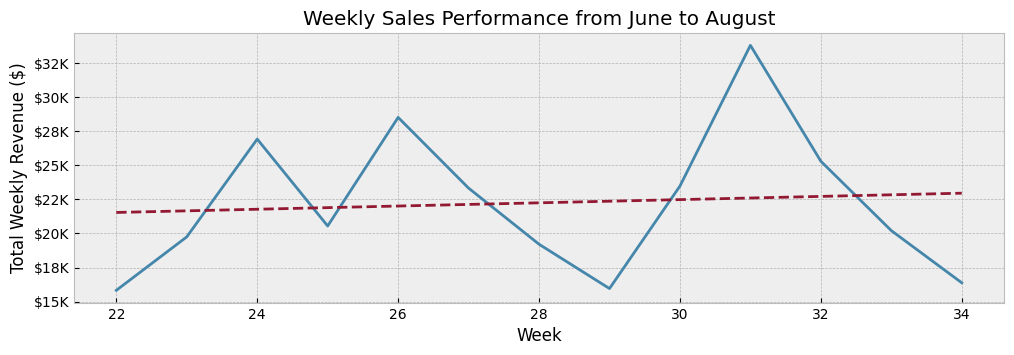

In [73]:
# Group the time_data dataframe by week and sum the total revenue for each week
weekly_revenue = time_data.groupby("Week")["Total Revenue"].sum()

# Reset the index of the weekly_revenue dataframe
weekly_revenue = weekly_revenue.reset_index()

# Convert the week numbers to a numerical format for trend line analysis
x_dates = weekly_revenue["Week"]

# Calculate a linear trend line using numpy's polyfit function
trend = np.polyfit(x_dates, weekly_revenue["Total Revenue"], 1)
fit = np.poly1d(trend)

# Create a figure and axis object
fig = plt.figure(figsize=(12,3.5))
ax1 = fig.add_subplot(111)

# Plot the weekly revenue over time
ax1.plot(x_dates, weekly_revenue["Total Revenue"], color = "#4586AB")
ax1.yaxis.set_major_formatter(thousands)
plt.xlabel('Week')
plt.ylabel("Total Weekly Revenue ($)")
plt.title("Weekly Sales Performance from June to August")

# Plot the linear trend line
x_fit = np.linspace(x_dates.min(), x_dates.max())
plt.plot((x_fit), fit(x_fit), color = "#931933",linestyle = "--")

# Display the plot
plt.show()

Previously, we saw how the warehouse located in the west side of the city ranked last in terms of number of transactions and revenue by product line. In grouping weekly sales performance by warehouse location, we can see that it has also been consistently underperforming over the course of the summer: while the Central and North warehouses have been experiencing a positive sales trend, the opposite is true for the West warehouse.

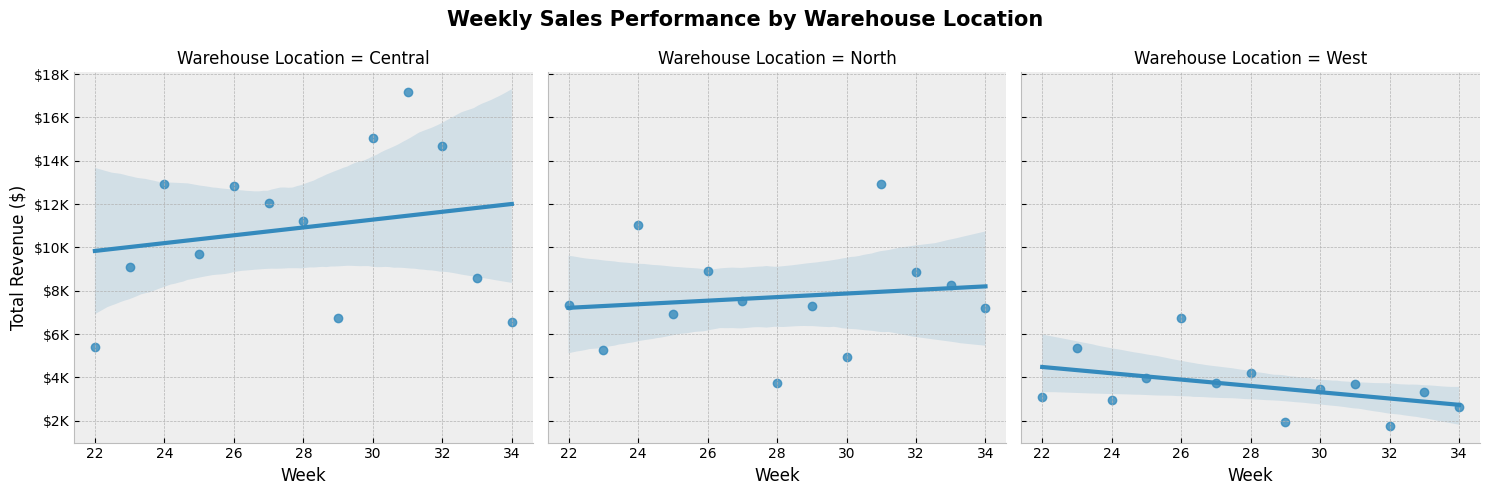

In [74]:
weekly_loc_revenue = time_data.groupby(["Week","Warehouse Location"])["Total Revenue"].sum()
weekly_loc_revenue = weekly_loc_revenue.reset_index()

g = sns.lmplot(x = "Week",y = "Total Revenue",col = "Warehouse Location", data = weekly_loc_revenue)
ax = g.facet_axis(0, 0)
ax.yaxis.set_major_formatter(thousands)
plt.suptitle("Weekly Sales Performance by Warehouse Location", fontsize = 15, fontweight = "bold")
g.set_ylabels("Total Revenue ($)")
plt.tight_layout()
plt.show()

Having analyzed the short-term fluctuations in the data, we can step back and aggregate it at a monthly level to determine how well the company performed from a broader perspective. In fact, following a period of decline in sales in the months of June and July, it seems to have experienced a leap of six thousand dollars in August; in this month, both revenue and number of motorcycle parts sold peaked. Interestingly enough, although in the month of July the company sold almost as many parts, it earned a significantly lower revenue. 

The reason for this lies in the product line break-down of the two variables. From July to August, the company sold fewer products with low unit prices, namely braking systems and miscellaneous items, whilst simultaneously seeing an increase in sales from the rest of its offering.

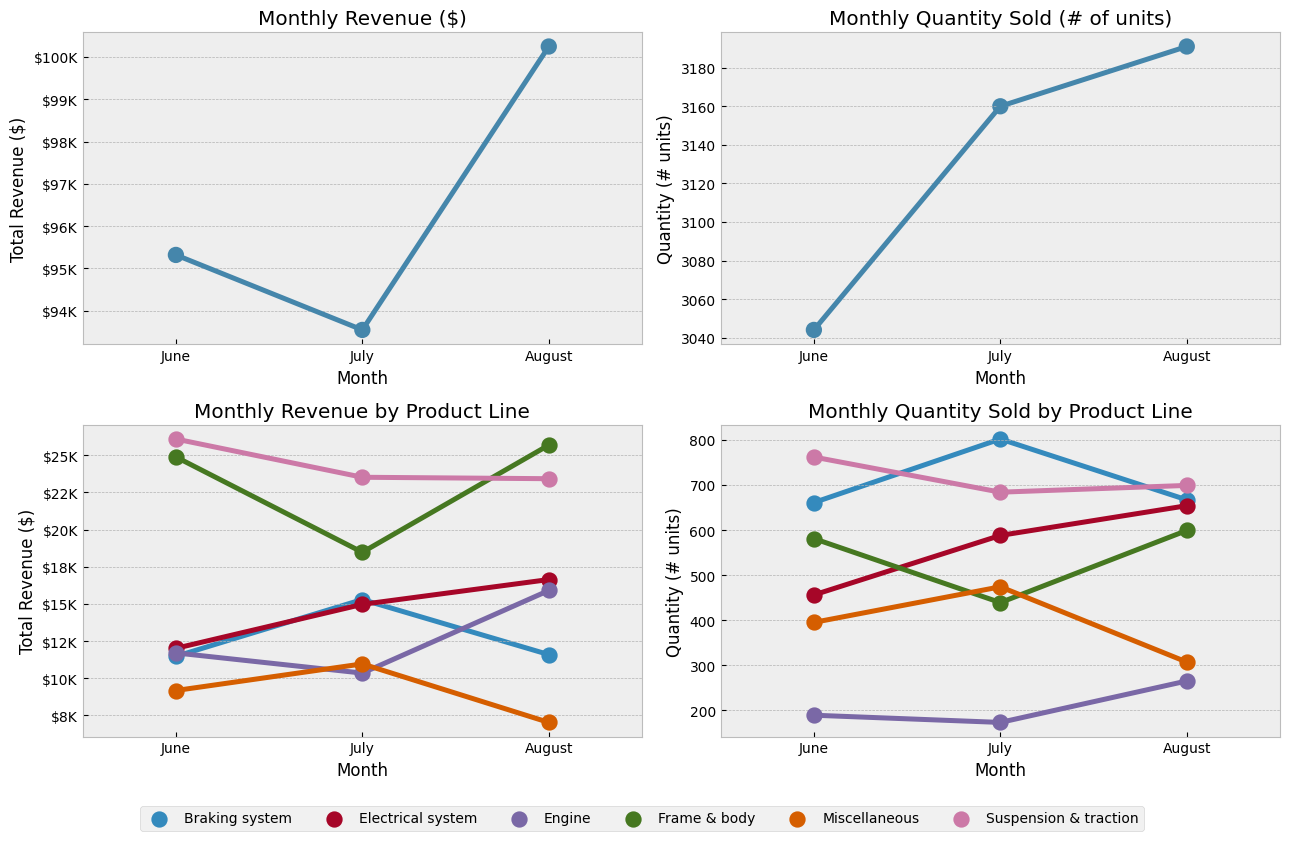

In [75]:
# Group the time_data dataframe by month and sum the total revenue and quantity sold for each month
monthly_sales = time_data.groupby("Month").agg({"Quantity":"sum",
                                               "Total Revenue":"sum"})
monthly_sales = monthly_sales.reset_index()

# Group the time_data dataframe by month and product line and sum the total revenue and quantity sold for each month and product line
monthly_sales_pl = time_data.groupby(["Month","Product Line"]).agg({"Quantity":"sum",
                                               "Total Revenue":"sum"})
monthly_sales_pl = monthly_sales_pl.reset_index()

# Create a 2x2 subplot figure with a size of 13x8
fig, axes = plt.subplots(2, 2, figsize=(13, 8))

# Plot the monthly revenue over time in the first subplot
sns.pointplot(x = "Month", y = "Total Revenue", data = monthly_sales, ax = axes[0,0], order = ["June", "July", "August"], color = "#4586AB")
axes[0,0].yaxis.set_major_formatter(thousands)
axes[0,0].set_ylabel("Total Revenue ($)")
axes[0,0].set_title("Monthly Revenue ($)")

# Plot the monthly quantity sold over time in the second subplot
sns.pointplot(x = "Month", y = "Quantity", data = monthly_sales, ax = axes[0,1],order = ["June", "July", "August"], color = "#4586AB")
axes[0,1].set_ylabel("Quantity (# units)")
axes[0,1].set_title("Monthly Quantity Sold (# of units)")

# Plot the monthly revenue by product line over time in the third subplot
sns.pointplot(x = "Month", y = "Total Revenue", hue = "Product Line", data = monthly_sales_pl, ax = axes[1,0], order = ["June", "July", "August"])

axes[1,0].yaxis.set_major_formatter(thousands)
axes[1,0].set_ylabel("Total Revenue ($)")
axes[1,0].set_title("Monthly Revenue by Product Line")

# Plot the monthly quantity sold by product line over time in the fourth subplot
sns.pointplot(x = "Month", y = "Quantity", hue = "Product Line", data = monthly_sales_pl, ax = axes[1,1],order = ["June", "July", "August"])

axes[1,1].set_ylabel("Quantity (# units)")
axes[1,1].set_title("Monthly Quantity Sold by Product Line")

#Adding space underneath the subplots to make room for the legend
fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.12)
handles, labels = axes[1,0].get_legend_handles_labels()

plt.tight_layout()

#Using the 3rd subplot's legend for both bottom plots and removing the second one.
axes[1,0].legend(handles, labels, loc='upper center', bbox_to_anchor=(1, -0.2), ncol=6)
axes[1,1].legend_.remove()

plt.show()

When it comes to the number of transactions by day of the week, overall, considering transactions from both wholesale and retail customers, Tuesdays are the most popular. However, for the inidivudal segments the day with most affluence differs: retail consumers tend to purchase motorcycle parts mostly on Saturdays, while wholesale customers on Tuesdays.

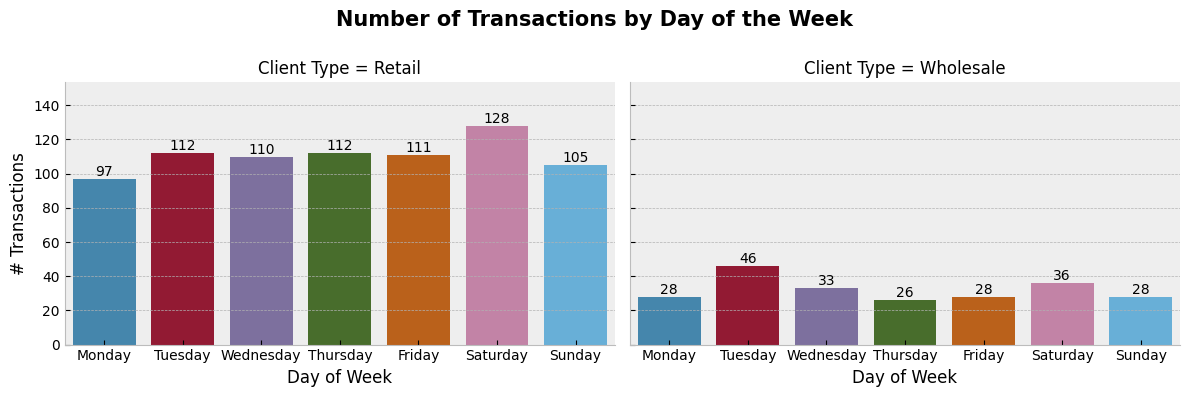

In [76]:
weekday_revenue = time_data.groupby(["Day of Week","Client Type"]).count().reset_index()

g = sns.catplot(x="Day of Week", y = "Date", col = "Client Type", data=weekday_revenue, kind="bar", ci=False,
         height=4, aspect=1.5, order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

ax = g.facet_axis(0, 0)
# iterate through the axes containers
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        labels = [round(v.get_height()) for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)
g.fig.subplots_adjust(top=.8)
plt.suptitle("Number of Transactions by Day of the Week", fontweight = "bold", fontsize = 15)
g.set_axis_labels("Day of Week", "# Transactions")
plt.show()

# 📙 Conclusions and Recommendations

Based on these findings, we can make several noteworthy conclusions and recommendations to management. As a small preamble, however, it's important to acknowledge that as the dataset is limited only to June, July, and August, broader trends and seasonality effects aren't captured. Thus, the conclusions that will follow should be interpreted with caution; to obtain an overarching understanding of the company's sales performance, it would be best to also analyze data from the anteceding and subsequent months in the year. 

The company's active presence in the motorcycle parts market is indicated by the significant volume of transactions (1,000) completed during the summer period. The primary contributer to these sales was the Central warehouse, accounting for 49% of total revenue (141,983 dollars). This underscores the strategic relevance of the warehouse's location in not only attracting customers, but also facilitating the distribution of motorcycle parts across the city. The same cannot be said for the West warehouse, which faced significant challenges in terms of sales and customer demand. It is crucial for the company to investigate and address the factors contributing to this underperformance; there may be a misalignment between the product offering and local customer preferences or a lack promotional efforts in the area.

When it comes to customer segmentation, retail customers represented 78% of transactions; there is significant market penetration among individual customers. The preferred payment method for this segment was the credit card, which constituted 66% of sales and highlights the convenience of electronic transactions for customers. This trend is perfectly aligned with the broader shift towards digital payment methods in modern business transactions. Meanwhile, bank transfers were the sole payment method utilised by wholesale customers which, albeit a minority, accounted for 55% of total revenue. Special pricing promotions dedicated to attracting new customers in this segment are encouraged.

Finally, the analysis reveals important insights into the product offering and its performance. The braking system, with the lowest average unit price, proved to be the most popular product line, comprising 23% of total sales. Suspension and traction systems displayed comparable sales figures, despite its higher average unit price. The company should consider bundling these with less popular — but complimentary — product lines in order to boost their sales. At a higher level, the company should keep a close eye on inventory due to its stronger correlation to total revenue compared to unit price. In other words, sales volume has a more significant impact on revenue generation than the specific pricing of individual items. Thus, the company should focus on strategies that drive increased sales volume, leveraging, once again, on marketing campaigns targeting wholesale customers who buy in bulk.